## Creating Alpha Polygons

Alpha polygons are based on Delaunay triangles whose points are all London tube stations. Based on the DBSCAN results, the number of Delaunay triangles are minimised accordingly.

Code is based on Kevin Dwyer's work at http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/

### Preparing packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
from descartes import PolygonPatch
import shapely.geometry as geometry
import pylab as pl
from matplotlib.collections import LineCollection
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay, ConvexHull, distance
import numpy as np
import math


%matplotlib inline
sns.set_context('poster')
sns.set_color_codes() 
plot_kwds = {'alpha' : 1, 's' : 60, 'linewidths':1}

### Making functions

In [4]:
# Function to plot the alpha polygons
def plot_polygon(polygon):
    fig = pl.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3
    x_min, y_min, x_max, y_max = polygon.bounds
    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999',
                         ec='#000000', fill=True,
                         zorder=-1)
    ax.add_patch(patch)
    return fig


def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
                # already added
            return 
        edges.add( (i, j) ) 
        edge_points.append([coords[i],coords[j]])

In [ ]:
# Reading the CSV files
baby = pd.read_csv('BabyChanging1.csv')
dis = pd.read_csv('Disabled1.csv')
quiet = pd.read_csv('QuietRoom1.csv')
toilet = pd.read_csv('station_toilets_xy.csv')
manned = pd.read_csv('station_manned_xy.csv')
lift = pd.read_csv('station_lifts_xy.csv')

In [545]:
# Changing the dataframe into a list
m = baby.values.tolist()
n = dis.values.tolist()
o = quiet.values.tolist()
p = toilet.values.tolist()
q = manned.values.tolist()
r = lift.values.tolist()

## Baby

In [546]:
y_baby = Delaunay(m)
y_simplices = y_baby.simplices

In [547]:
# Making an array of lon and lat
lon_m = []
for i in range(0,len(m)):
    lon_m.append(m[i][0])
    
lat_m = []
for i in range(0,len(m)):
    lat_m.append(m[i][1])

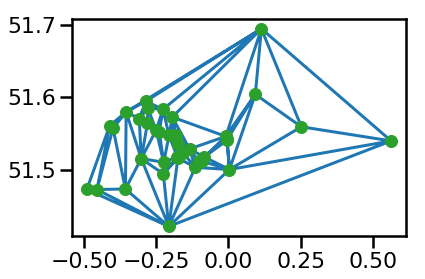

In [548]:
plt.triplot(lon_m, lat_m, y_baby.simplices)
plt.plot(lon_m, lat_m, 'o')

In [549]:
# Making an array of distance for each point in the lon lat data
distance.cdist(m, m, 'euclidean')

array([[0.        , 0.66760486, 0.05345922, ..., 0.18438277, 0.10021854,
        0.10234669],
       [0.66760486, 0.        , 0.71960169, ..., 0.84427774, 0.57278422,
        0.5687468 ],
       [0.05345922, 0.71960169, 0.        , ..., 0.13118776, 0.1484844 ,
        0.15170585],
       ...,
       [0.18438277, 0.84427774, 0.13118776, ..., 0.        , 0.27177599,
        0.27617916],
       [0.10021854, 0.57278422, 0.1484844 , ..., 0.27177599, 0.        ,
        0.00675003],
       [0.10234669, 0.5687468 , 0.15170585, ..., 0.27617916, 0.00675003,
        0.        ]])

In [550]:
tri = Delaunay(m)

In [747]:
alpha = 30

edges_m = set()
edge_points_m = []
for ia, ib, ic in tri.vertices:
        pa = m[ia]
        pb = m[ib]
        pc = m[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_m, edge_points_m, m, ia, ib)
            add_edge(edges_m, edge_points_m, m, ib, ic)
            add_edge(edges_m, edge_points_m, m, ic, ia)

In [748]:
edge_points_m

[[[-0.223711689, 51.5100739], [-0.225082867, 51.494096299999995]],
 [[-0.225082867, 51.494096299999995], [-0.1767, 51.5175]],
 [[-0.1767, 51.5175], [-0.223711689, 51.5100739]],
 [[-0.225082867, 51.494096299999995], [-0.17449068899999998, 51.51595476]],
 [[-0.17449068899999998, 51.51595476], [-0.1767, 51.5175]],
 [[-0.003884484, 51.54149404], [-0.004857309000000001, 51.54032861]],
 [[-0.004857309000000001, 51.54032861], [0.0038848109999999997, 51.5000936]],
 [[0.0038848109999999997, 51.5000936], [-0.003884484, 51.54149404]],
 [[-0.003884484, 51.54149404], [-0.008861089, 51.545763]],
 [[-0.008861089, 51.545763], [-0.004857309000000001, 51.54032861]],
 [[-0.280039989, 51.5637683], [-0.308399789, 51.5702541]],
 [[-0.308399789, 51.5702541], [-0.301543389, 51.5152]],
 [[-0.301543389, 51.5152], [-0.280039989, 51.5637683]],
 [[-0.24996308899999997, 51.5541682], [-0.280039989, 51.5637683]],
 [[-0.301543389, 51.5152], [-0.24996308899999997, 51.5541682]],
 [[-0.17449068899999998, 51.51595476], [-

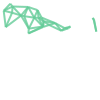

In [749]:
ml = geometry.MultiLineString(edge_points_m)
ml

In [750]:
triangles_m = list(polygonize(ml))

In [751]:
baby_polygon = cascaded_union(triangles_m)
baby_polygon2 = baby_polygon.buffer(0.006)

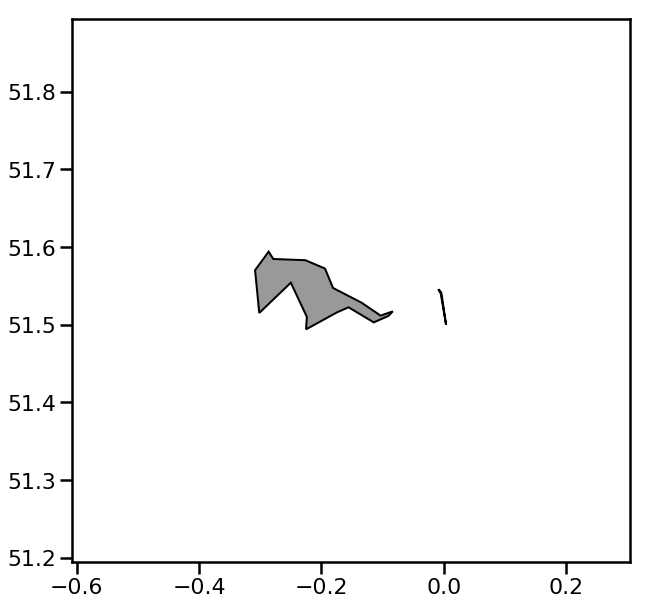

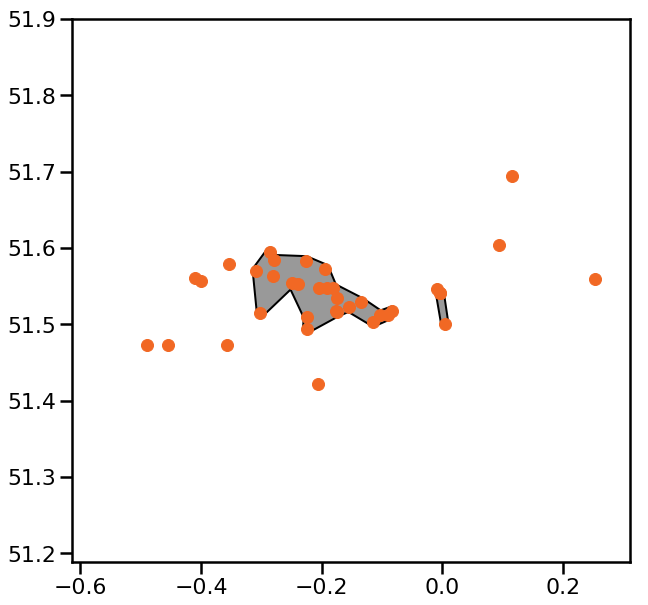

In [752]:
plot_polygon(baby_polygon)
plot_polygon(baby_polygon2)
_ = pl.plot(lon_m,lat_m,'o', color='#f16824')

### Disabled

In [753]:
y_dis = Delaunay(n)
y_simplices2 = y_dis.simplices

In [558]:
# Making an array of lon and lat
lon_n = []
for i in range(0,len(n)):
    lon_n.append(n[i][0])
    
lat_n = []
for i in range(0,len(n)):
    lat_n.append(n[i][1])

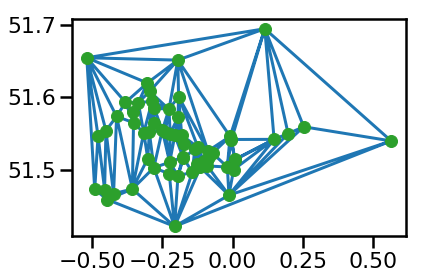

In [559]:
plt.triplot(lon_n, lat_n, y_simplices2)
plt.plot(lon_n, lat_n, 'o')

In [560]:
# Making an array of distance for each point in the lon lat data
distance.cdist(n, n, 'euclidean')

array([[0.        , 0.17701234, 0.84461012, ..., 0.26968737, 0.27446388,
        0.27762893],
       [0.17701234, 0.        , 0.66760486, ..., 0.101765  , 0.10021854,
        0.10234669],
       [0.84461012, 0.66760486, 0.        , ..., 0.58162682, 0.57278422,
        0.5687468 ],
       ...,
       [0.26968737, 0.101765  , 0.58162682, ..., 0.        , 0.08114997,
        0.07604208],
       [0.27446388, 0.10021854, 0.57278422, ..., 0.08114997, 0.        ,
        0.00675003],
       [0.27762893, 0.10234669, 0.5687468 , ..., 0.07604208, 0.00675003,
        0.        ]])

In [561]:
tri_n = Delaunay(n)

In [741]:
alpha = 30

edges_n = set()
edge_points_n = []
for ia, ib, ic in tri_n.vertices:
        pa = n[ia]
        pb = n[ib]
        pc = n[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_n, edge_points_n, n, ia, ib)
            add_edge(edges_n, edge_points_n, n, ib, ic)
            add_edge(edges_n, edge_points_n, n, ic, ia)

In [742]:
edge_points_n

[[[-0.423116489, 51.4667206], [-0.455001289, 51.472504799999996]],
 [[-0.455001289, 51.472504799999996], [-0.445434589, 51.458659000000004]],
 [[-0.445434589, 51.458659000000004], [-0.423116489, 51.4667206]],
 [[-0.455001289, 51.472504799999996], [-0.49010428899999997, 51.4725477]],
 [[-0.49010428899999997, 51.4725477], [-0.445434589, 51.458659000000004]],
 [[-0.295882589, 51.5513951], [-0.279916689, 51.5026436]],
 [[-0.279916689, 51.5026436], [-0.24996308899999997, 51.5541682]],
 [[-0.24996308899999997, 51.5541682], [-0.295882589, 51.5513951]],
 [[-0.295882589, 51.5513951], [-0.301543389, 51.5152]],
 [[-0.301543389, 51.5152], [-0.279916689, 51.5026436]],
 [[-0.295882589, 51.5513951], [-0.315803489, 51.5508479]],
 [[-0.315803489, 51.5508479], [-0.301543389, 51.5152]],
 [[-0.41238808899999996, 51.5733074], [-0.352209789, 51.56466210000001]],
 [[-0.352209789, 51.56466210000001], [-0.380809789, 51.5927136]],
 [[-0.380809789, 51.5927136], [-0.41238808899999996, 51.5733074]],
 [[-0.19194408

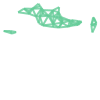

In [743]:
nl = geometry.MultiLineString(edge_points_n)
nl

In [744]:
triangles_n = list(polygonize(nl))

In [745]:
dis_polygon = cascaded_union(triangles_n)
dis_polygon2 = dis_polygon.buffer(0.006)

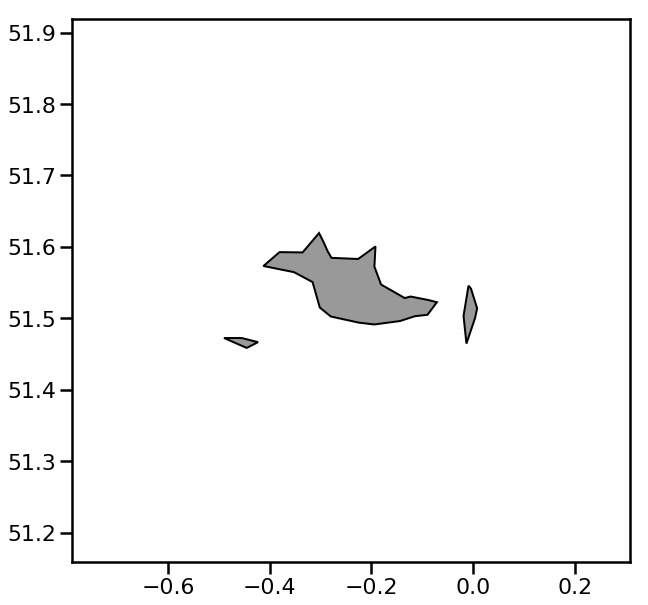

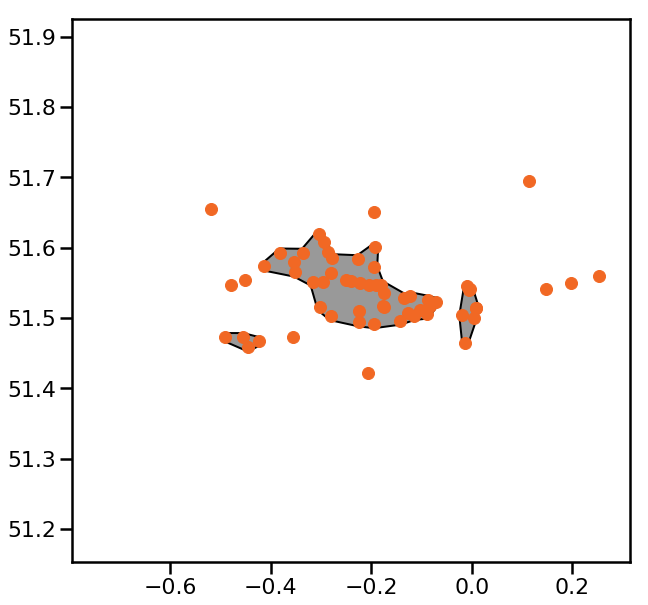

In [746]:
plot_polygon(dis_polygon)
plot_polygon(dis_polygon2)
_ = pl.plot(lon_n,lat_n,'o', color='#f16824')

## Quiet Room

In [568]:
y_qui = Delaunay(o)
y_simplices3 = y_qui.simplices

In [569]:
# Making an array of lon and lat
lon_o = []
for i in range(0,len(o)):
    lon_o.append(o[i][0])
    
lat_o = []
for i in range(0,len(o)):
    lat_o.append(o[i][1])

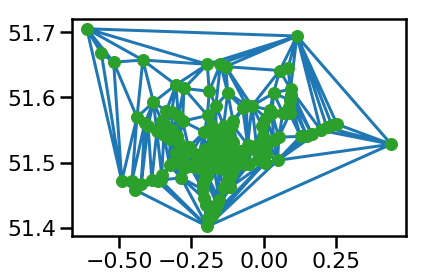

In [570]:
plt.triplot(lon_o, lat_o, y_simplices3)
plt.plot(lon_o, lat_o, 'o')

In [571]:
# Making an array of distance for each point in the lon lat data
distance.cdist(o, o, 'euclidean')

array([[0.        , 0.20841551, 0.17621909, ..., 0.06112482, 0.2590317 ,
        0.32793012],
       [0.20841551, 0.        , 0.03809629, ..., 0.21376626, 0.05194605,
        0.12043598],
       [0.17621909, 0.03809629, 0.        , ..., 0.17681993, 0.08930179,
        0.15669042],
       ...,
       [0.06112482, 0.21376626, 0.17681993, ..., 0.        , 0.26568489,
        0.33351029],
       [0.2590317 , 0.05194605, 0.08930179, ..., 0.26568489, 0.        ,
        0.06892538],
       [0.32793012, 0.12043598, 0.15669042, ..., 0.33351029, 0.06892538,
        0.        ]])

In [572]:
tri_o = Delaunay(o)

In [754]:
alpha = 30

edges_o = set()
edge_points_o = []
for ia, ib, ic in tri_o.vertices:
        pa = o[ia]
        pb = o[ib]
        pc = o[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_o, edge_points_o, o, ia, ib)
            add_edge(edges_o, edge_points_o, o, ib, ic)
            add_edge(edges_o, edge_points_o, o, ic, ia)

In [755]:
edge_points_o

[[[-0.445434589, 51.458659000000004], [-0.455001289, 51.472504799999996]],
 [[-0.455001289, 51.472504799999996], [-0.49010428899999997, 51.4725477]],
 [[-0.49010428899999997, 51.4725477], [-0.445434589, 51.458659000000004]],
 [[-0.423116489, 51.4667206], [-0.455001289, 51.472504799999996]],
 [[-0.445434589, 51.458659000000004], [-0.423116489, 51.4667206]],
 [[-0.352296489, 51.4811241], [-0.38644708899999997, 51.47352539999999]],
 [[-0.38644708899999997, 51.47352539999999],
  [-0.36641308899999997, 51.4713061]],
 [[-0.36641308899999997, 51.4713061], [-0.352296489, 51.4811241]],
 [[-0.25453008899999996, 51.4951435], [-0.245834689, 51.49493820000001]],
 [[-0.245834689, 51.49493820000001], [-0.247572189, 51.5168692]],
 [[-0.247572189, 51.5168692], [-0.25453008899999996, 51.4951435]],
 [[-0.35631308899999997, 51.473228399999996], [-0.352296489, 51.4811241]],
 [[-0.36641308899999997, 51.4713061],
  [-0.35631308899999997, 51.473228399999996]],
 [[-0.352296489, 51.4811241], [-0.324733389, 51.4

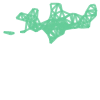

In [756]:
ol = geometry.MultiLineString(edge_points_o)
ol

In [757]:
triangles_o = list(polygonize(ol))

In [758]:
qui_polygon = cascaded_union(triangles_o)
qui_polygon2 = qui_polygon.buffer(0.006)

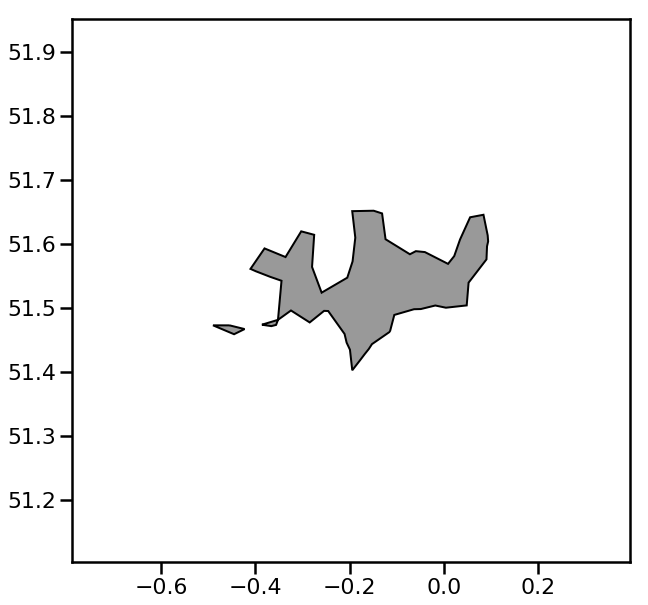

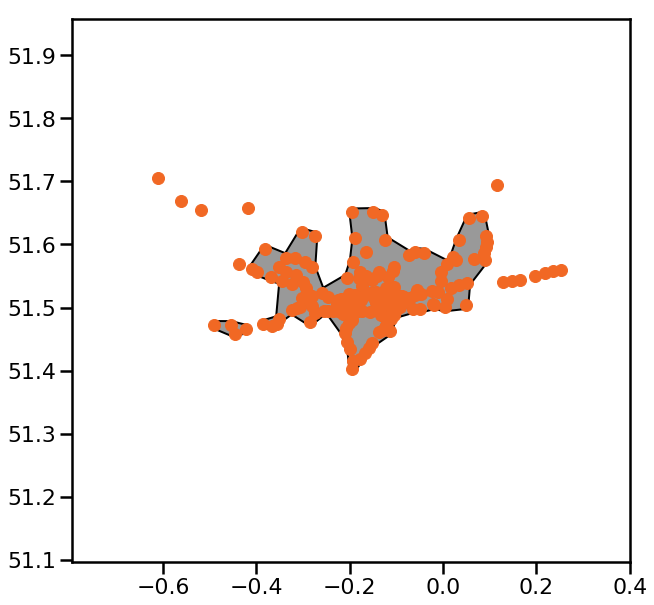

In [759]:
plot_polygon(qui_polygon)
plot_polygon(qui_polygon2)
_ = pl.plot(lon_o,lat_o,'o', color='#f16824')

## Toilet

In [883]:
y_toi = Delaunay(p)
y_simplices4 = y_toi.simplices

In [884]:
# Making an array of lon and lat
lon_p = []
for i in range(0,len(p)):
    lon_p.append(p[i][0])
    
lat_p = []
for i in range(0,len(p)):
    lat_p.append(p[i][1])

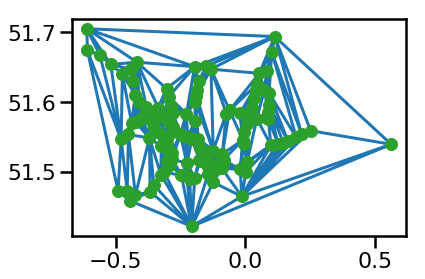

In [885]:
plt.triplot(lon_p, lat_p, y_simplices4)
plt.plot(lon_p, lat_p, 'o')

In [886]:
# Making an array of distance for each point in the lon lat data
distance.cdist(p, p, 'euclidean')

array([[0.        , 0.33667851, 0.42672376, ..., 0.29641152, 0.29064037,
        0.29459757],
       [0.33667851, 0.        , 0.74781985, ..., 0.63132989, 0.61321045,
        0.61827991],
       [0.42672376, 0.74781985, 0.        , ..., 0.15926983, 0.13623863,
        0.13212622],
       ...,
       [0.29641152, 0.63132989, 0.15926983, ..., 0.        , 0.08114997,
        0.07604208],
       [0.29064037, 0.61321045, 0.13623863, ..., 0.08114997, 0.        ,
        0.00675003],
       [0.29459757, 0.61827991, 0.13212622, ..., 0.07604208, 0.00675003,
        0.        ]])

In [887]:
tri_p = Delaunay(p)

In [888]:
alpha = 10

edges_p = set()
edge_points_p = []
for ia, ib, ic in tri_p.vertices:
        pa = p[ia]
        pb = p[ib]
        pc = p[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_p, edge_points_p, p, ia, ib)
            add_edge(edges_p, edge_points_p, p, ib, ic)
            add_edge(edges_p, edge_points_p, p, ic, ia)

In [889]:
edge_points_p

[[[-0.608468689, 51.674206700000006], [-0.560820489, 51.6680419]],
 [[-0.560820489, 51.6680419], [-0.610929989, 51.705389600000004]],
 [[-0.610929989, 51.705389600000004], [-0.608468689, 51.674206700000006]],
 [[-0.47841128899999996, 51.5464342], [-0.518355789, 51.6541809]],
 [[-0.518355789, 51.6541809], [-0.560820489, 51.6680419]],
 [[-0.560820489, 51.6680419], [-0.47841128899999996, 51.5464342]],
 [[-0.47841128899999996, 51.5464342], [-0.473582489, 51.6401815]],
 [[-0.473582489, 51.6401815], [-0.518355789, 51.6541809]],
 [[-0.423116489, 51.4667206], [-0.455001289, 51.472504799999996]],
 [[-0.455001289, 51.472504799999996], [-0.445434589, 51.458659000000004]],
 [[-0.445434589, 51.458659000000004], [-0.423116489, 51.4667206]],
 [[-0.423116489, 51.4667206], [-0.450198389, 51.5537255]],
 [[-0.450198389, 51.5537255], [-0.455001289, 51.472504799999996]],
 [[-0.47841128899999996, 51.5464342], [-0.455001289, 51.472504799999996]],
 [[-0.450198389, 51.5537255], [-0.47841128899999996, 51.546434

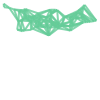

In [890]:
ppl = geometry.MultiLineString(edge_points_p)
ppl

In [891]:
triangles_p = list(polygonize(ppl))

In [892]:
toi_polygon = cascaded_union(triangles_p)
toi_polygon2 = toi_polygon.buffer(0.006)

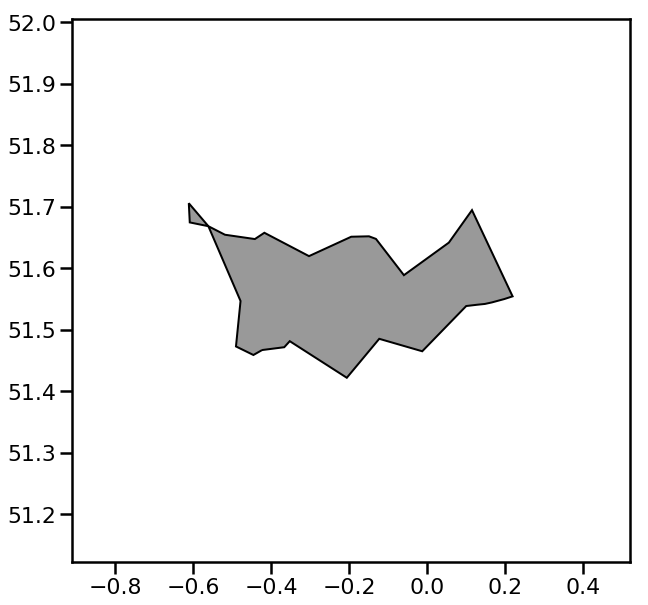

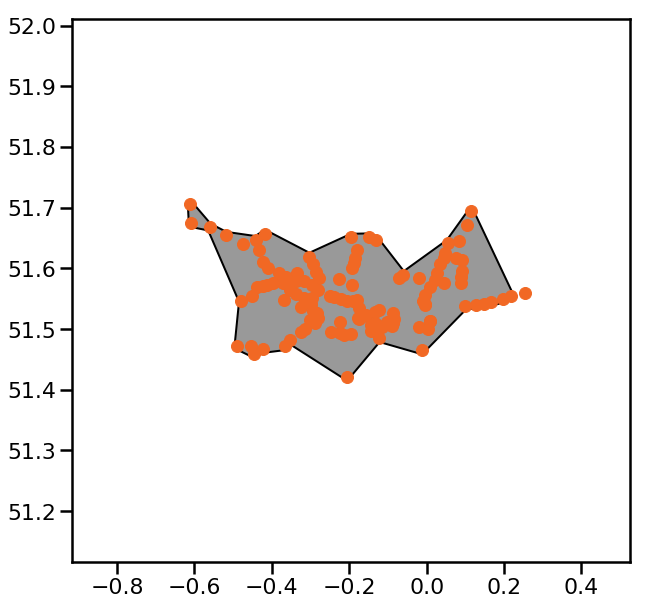

In [893]:
plot_polygon(toi_polygon)
plot_polygon(toi_polygon2)
_ = pl.plot(lon_p,lat_p,'o', color='#f16824')

## Manned

In [770]:
y_man = Delaunay(q)
y_simplices5 = y_man.simplices

In [771]:
# Making an array of lon and lat
lon_q = []
for i in range(0,len(q)):
    lon_q.append(q[i][0])
    
lat_q = []
for i in range(0,len(q)):
    lat_q.append(q[i][1])

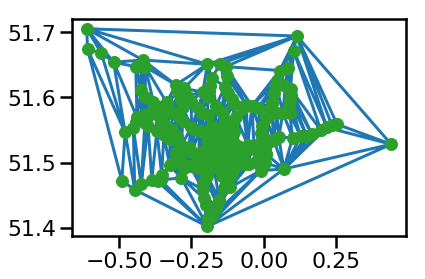

In [772]:
plt.triplot(lon_q, lat_q, y_simplices5)
plt.plot(lon_q, lat_q, 'o')

In [773]:
# Making an array of distance for each point in the lon lat data
distance.cdist(q, q, 'euclidean')

array([[0.        , 0.08046679, 0.0440954 , ..., 0.14596884, 0.14465593,
        0.21749734],
       [0.08046679, 0.        , 0.03809629, ..., 0.07624384, 0.0779436 ,
        0.14343029],
       [0.0440954 , 0.03809629, 0.        , ..., 0.11087834, 0.11119568,
        0.18035976],
       ...,
       [0.14596884, 0.07624384, 0.11087834, ..., 0.        , 0.00748621,
        0.07188954],
       [0.14465593, 0.0779436 , 0.11119568, ..., 0.00748621, 0.        ,
        0.07461152],
       [0.21749734, 0.14343029, 0.18035976, ..., 0.07188954, 0.07461152,
        0.        ]])

In [774]:
tri_q = Delaunay(q)

In [873]:
alpha = 23

edges_q = set()
edge_points_q = []
for ia, ib, ic in tri_q.vertices:
        pa = q[ia]
        pb = q[ib]
        pc = q[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_q, edge_points_q, q, ia, ib)
            add_edge(edges_q, edge_points_q, q, ib, ic)
            add_edge(edges_q, edge_points_q, q, ic, ia)

In [874]:
edge_points_q

[[[-0.608468689, 51.674206700000006], [-0.560820489, 51.6680419]],
 [[-0.560820489, 51.6680419], [-0.610929989, 51.705389600000004]],
 [[-0.610929989, 51.705389600000004], [-0.608468689, 51.674206700000006]],
 [[0.099727711, 51.5382666], [0.052011410999999994, 51.5392429]],
 [[0.052011410999999994, 51.5392429], [0.069384611, 51.4902972]],
 [[0.069384611, 51.4902972], [0.099727711, 51.5382666]],
 [[0.099727711, 51.5382666], [0.12726891099999998, 51.5403235]],
 [[0.12726891099999998, 51.5403235], [0.089947311, 51.575598]],
 [[0.089947311, 51.575598], [0.099727711, 51.5382666]],
 [[0.103210311, 51.6717381], [0.083573311, 51.6452929]],
 [[0.083573311, 51.6452929], [0.092516111, 51.613121]],
 [[0.092516111, 51.613121], [0.103210311, 51.6717381]],
 [[0.103210311, 51.6717381], [0.055254911, 51.641360600000006]],
 [[0.055254911, 51.641360600000006], [0.083573311, 51.6452929]],
 [[-0.131485189, 51.6473767], [-0.149350289, 51.651605100000005]],
 [[-0.149350289, 51.651605100000005], [-0.127810689

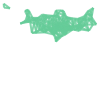

In [875]:
ql = geometry.MultiLineString(edge_points_q)
ql

In [876]:
triangles_q = list(polygonize(ql))

In [877]:
man_polygon = cascaded_union(triangles_q)
man_polygon2 = man_polygon.buffer(0.006)

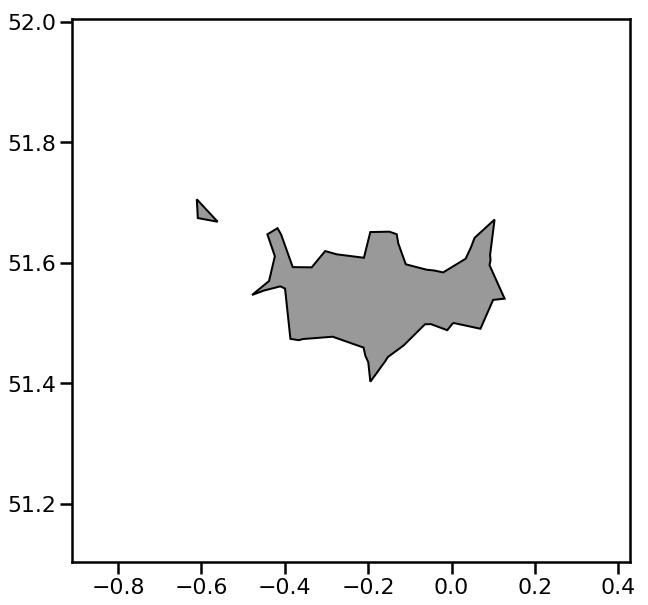

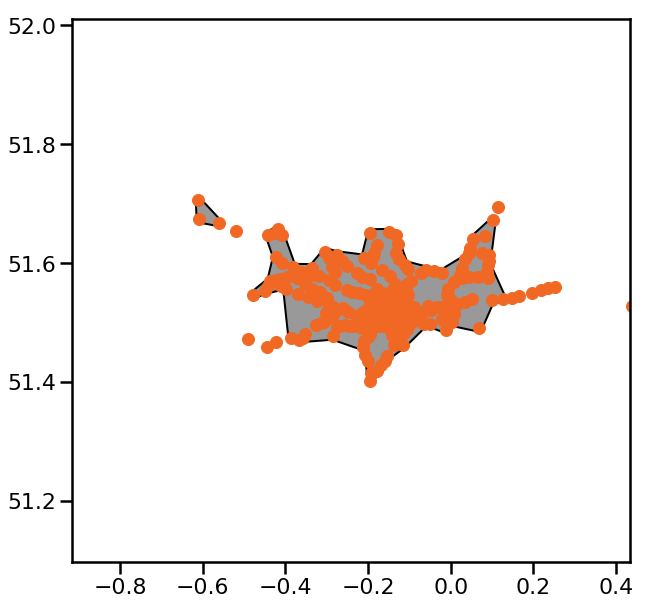

In [878]:
plot_polygon(man_polygon)
plot_polygon(man_polygon2)
_ = pl.plot(lon_q,lat_q,'o', color='#f16824')

## Lift

In [859]:
y_lift = Delaunay(r)
y_simplices6 = y_lift.simplices

In [832]:
# Making an array of lon and lat
lon_r = []
for i in range(0,len(r)):
    lon_r.append(r[i][0])
    
lat_r = []
for i in range(0,len(r)):
    lat_r.append(r[i][1])

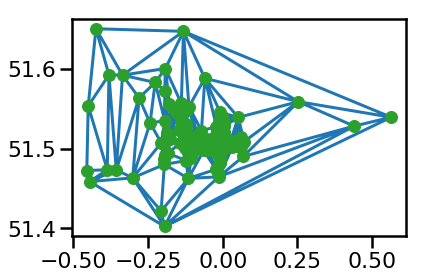

In [833]:
plt.triplot(lon_r, lat_r, y_simplices6)
plt.plot(lon_r, lat_r, 'o')

In [834]:
# Making an array of distance for each point in the lon lat data
distance.cdist(r, r, 'euclidean')

array([[0.        , 0.62901551, 0.65339802, ..., 0.58520148, 0.49694607,
        0.54299653],
       [0.62901551, 0.        , 0.02974474, ..., 0.04429463, 0.13333012,
        0.08602075],
       [0.65339802, 0.02974474, 0.        , ..., 0.06889716, 0.16005759,
        0.11161191],
       ...,
       [0.58520148, 0.04429463, 0.06889716, ..., 0.        , 0.09131155,
        0.04271479],
       [0.49694607, 0.13333012, 0.16005759, ..., 0.09131155, 0.        ,
        0.04891826],
       [0.54299653, 0.08602075, 0.11161191, ..., 0.04271479, 0.04891826,
        0.        ]])

In [835]:
tri_r = Delaunay(r)

In [836]:
alpha = 15

edges_r = set()
edge_points_r = []
for ia, ib, ic in tri_r.vertices:
        pa = r[ia]
        pb = r[ib]
        pc = r[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges_r, edge_points_r, r, ia, ib)
            add_edge(edges_r, edge_points_r, r, ib, ic)
            add_edge(edges_r, edge_points_r, r, ic, ia)

In [837]:
edge_points_r

[[[-0.450198389, 51.5537255], [-0.380809789, 51.5927136]],
 [[-0.380809789, 51.5927136], [-0.42436837, 51.65062643]],
 [[-0.42436837, 51.65062643], [-0.450198389, 51.5537255]],
 [[-0.35631308899999997, 51.473228399999996], [-0.335398789, 51.5923213]],
 [[-0.335398789, 51.5923213], [-0.380809789, 51.5927136]],
 [[-0.380809789, 51.5927136], [-0.35631308899999997, 51.473228399999996]],
 [[-0.35631308899999997, 51.473228399999996], [-0.280039989, 51.5637683]],
 [[-0.280039989, 51.5637683], [-0.335398789, 51.5923213]],
 [[-0.19194408899999998, 51.600683200000006],
  [-0.138432889, 51.556808000000004]],
 [[-0.138432889, 51.556808000000004], [-0.131485189, 51.6473767]],
 [[-0.131485189, 51.6473767], [-0.19194408899999998, 51.600683200000006]],
 [[-0.114872007, 51.46260626], [-0.20616420300000002, 51.42163588]],
 [[-0.20616420300000002, 51.42163588], [-0.194733689, 51.4023455]],
 [[-0.194733689, 51.4023455], [-0.114872007, 51.46260626]],
 [[-0.24317958899999997, 51.532248700000004],
  [-0.2260

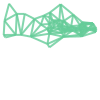

In [838]:
rl = geometry.MultiLineString(edge_points_r)
rl

In [827]:
triangles_r = list(polygonize(rl))

In [839]:
lift_polygon = cascaded_union(triangles_r)
lift_polygon2 = lift_polygon.buffer(0.006)

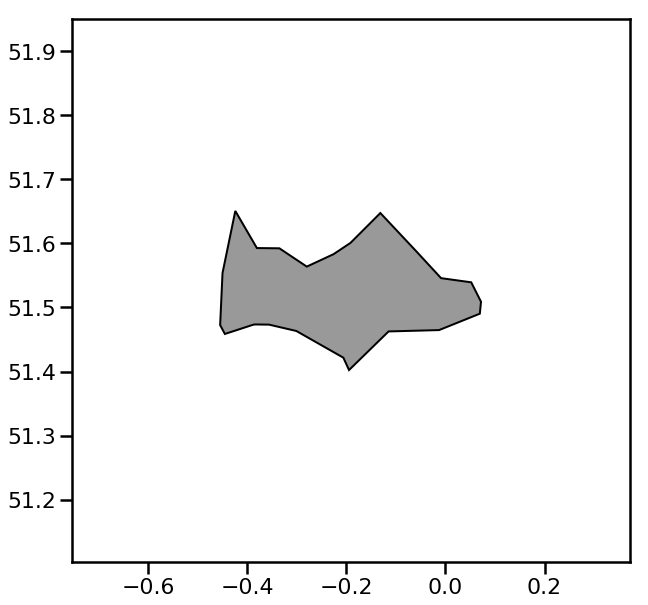

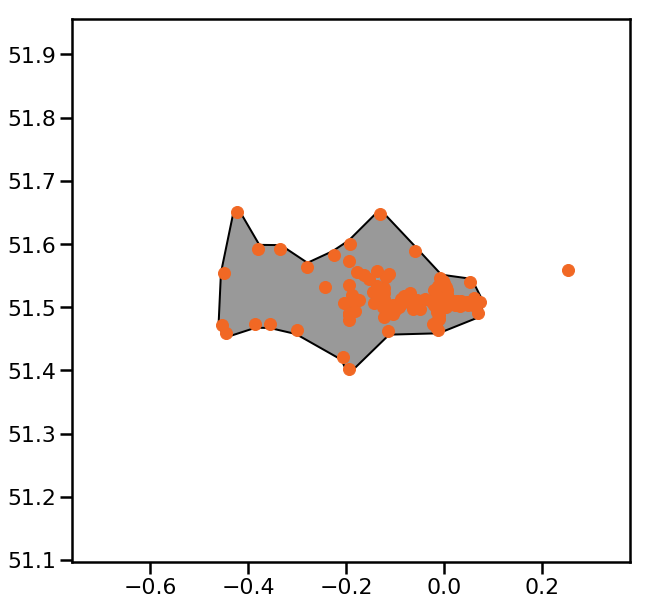

In [840]:
plot_polygon(lift_polygon)
plot_polygon(lift_polygon2)
_ = pl.plot(lon_r,lat_r,'o', color='#f16824')

### Transforming the polygons into GeoJSON format

In [830]:
import geojson
import tempfile
from shapely.geometry import *
import json

In [896]:
geojson_baby = json.dumps(mapping(baby_polygon2)) 
geojson_dis = json.dumps(mapping(dis_polygon2)) 
geojson_qui = json.dumps(mapping(qui_polygon2)) 
geojson_toi = json.dumps(mapping(toi_polygon2)) 
geojson_man = json.dumps(mapping(man_polygon2)) 
geojson_lift = json.dumps(mapping(lift_polygon2)) 